In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##**1.What is a Regularization?**
- Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus prevent the overfitting.
- According to good fellow: “In the context of deep learning, most regularization strategies are based on regularizing estimators. Regularization of an estimator works by trading increased bias for reduced variance. An eﬀective regularizer is one that makes a proﬁtabletrade, reducing variance signiﬁcantly while not overly increasing the bias.”
- When we use these techneques we need to train model more epochs
- First we need to train our model without regularization to have base criteria
- In some cases regularization have oposite effect and cause worse overal Loss and Accuracy

***Regularization Method:***
- L2 and L1 --> Elastic net
- Dropout
- Early stopping
- Batch normalization
- Data augmentation

https://theaisummer.com/regularization/

###**The bias-variance trade-off**
- The High bias error is an error from wrong assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs. This is called **underfitting**.

- The high variance is an error from sensitivity to small fluctuations in the training set. High variance may result in modeling the random noise in the training data. This is called **overfitting**.
<img src="https://theaisummer.com/static/3f94b32cc2c0261689b66eca53521c6f/42de8/overfitting.png">

###**L1, L2 regularization**
###**Backpropagation**
After calculate derivative we update wieght as:

$w=w−α∇_wJ(w;X,y)$ where $α$ is learning rate

###**L2 regularization**
also known as weight decay or ridge regression, adds a norm penalty in the form of $Ω(θ)=\frac{1}{2}||w||^2_2$
- $||w||^2_2 = w^T.w$
- The L2 regularizer will have a big impact on the directions of the weight vector that don’t “contribute” much to the loss function. On the other hand, it will have a relatively small effect on the directions that contribute to the loss function
- have lower effect on small data (near to zero)
- $J(w, b) = \frac{1}{m}(\hat{y}^2 - y^2) + \frac{2}{m}||w||^2_2$
  - where **m** is nubmer of data **J** is cost function(in this example MSE) $\hat{y}$ is predicted label
- Now Backpropagation well be:
  - $w=w - α(\frac{1}{m}J + \frac{λ}{m}||w||^2_2)$
  - $w=w - \frac{αλ}{m}||w||^2_2 - \frac{α}{m}J)$
  - $w=(1−αλ)w−α∇ wJ(w;X,y)$


###**L1 regularization**
chooses a norm penalty of $Ω(θ)=||w||$
- The L1 regularizer introduces sparsity in the weights by forcing more weights to be zero instead of reducing the average magnitude of all weights ( as the L2 regularizer does). In other words, L1 suggests that some features should be discarded whatsoever from the training process.
- have almost same effect on all data

### **Elastic net**
$Ω(θ)=λ_1||ω||_1 + λ_2||ω||^2_2$


###**Dropout**
- it's better working in big layers with to many neuron 

<img src="https://theaisummer.com/static/b554f90b0976c40825f40b5833bad57a/1b19f/dropout.png" width="400">
<img src="https://quantdare.com/wp-content/uploads/2021/05/Webp.net-gifmaker.gif", width="400">

###**Early stopping**
<img src="https://theaisummer.com/static/7a6353ed78b045f32e4ac39b0b4d66d2/a878e/early-stopping.png" width="400">

###**Batch normalization**
Batch normalization fixes the means and variances of the input by bringing the feature in the same range
- after convolv the image and befor activation fiunction we use batch normolization layers

<table>
  <td><img src="https://theaisummer.com/static/d42512016d9b99eabb69a61bb295cd50/2e9f9/normalization.png" width="400" height="300"></td>     
  <th>
  $μ_B=\frac{1}{m}\sum_{i=1}^m x_i $

  $σ^2_B=\frac{1}{m}\sum_{i=1}^m (x_i - μ_B)^2$

  ${x_i} = \frac{x_i - μ_B}{\sqrt{σ^2_B - ε}}$

  $y_i = γ\hat{x_i} + β = BN_γ,_β(\hat{x_i})$
  </th>
</table> 

###**Data augmentation**
<img src="https://d3i71xaburhd42.cloudfront.net/27c495019bae2d7ab5b607e11a47a39cd9f1c519/3-Figure2-1.png"> 

**2.Train without Regularization**

In [ ]:
FashionMnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_dev, y_dev) = FashionMnist.load_data()
classes = ['T-shirt/top',	'Trouser',	'Pullover',	'Dress', 'Coat',	'Sandal',	'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_train = (X_train).reshape(-1, 28, 28, 1).astype(np.float32) / 255.
X_dev = (X_dev).reshape(-1, 28, 28, 1).astype(np.float32) / 255.

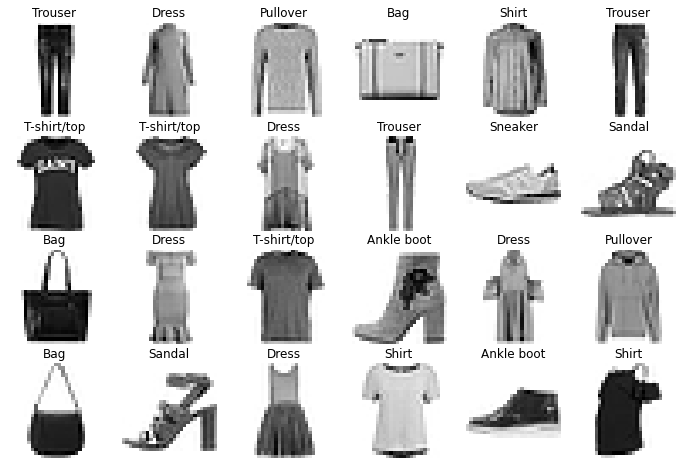

In [ ]:
fig = plt.figure(figsize=(12, 8))
row, col = 4, 6
for i in range(1, row*col +1):
  idx = np.random.randint(0, len(X_train))
  fig.add_subplot(row, col, i)
  plt.imshow(X_train[idx], cmap='gray_r')
  plt.title(classes[y_train[idx]])
  plt.axis(False)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_dev = tf.keras.utils.to_categorical(y_dev)

print (f"Number of Classes: {y_dev.shape[1]}")

num_classes = y_dev.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

Number of Classes: 10


##**Train model without Regularization**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=(None, 28, 28, 1))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_dev, y_dev))

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 2.1676 - accuracy: 0.3431 - val_loss: 1.8011 - val_accuracy: 0.5488
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 1.0920 - accuracy: 0.6662 - val_loss: 0.8047 - val_accuracy: 0.7191
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.7088 - accuracy: 0.7518 - val_loss: 0.6761 - val_accuracy: 0.7588
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6235 - accuracy: 0.7780 - val_loss: 0.6174 - val_accuracy: 0.7803
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5806 - accuracy: 0.7937 - val_loss: 0.5908 - val_accuracy: 0.7823
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.5531 - accuracy: 0.8016 - val_loss: 0.5652 - val_accuracy: 0.7935
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5331 - accuracy: 0.8086 - val_loss: 0.5632 - val_accuracy: 0.7902
Epoch 

In [ ]:
pred = np.argmax(model.predict(X_dev), axis=-1)
y_dev_new = np.argmax(y_dev, axis=1)
accuracy = (np.sum(np.equal(y_dev_new, pred)) / len(pred)) * 100
print(f"Model Accuracy is: {accuracy}")

313/313 [==============================] - 1s 2ms/step
Model Accuracy is: 79.74


##**Train model with Regularization**

In [ ]:
# We have realy small model so we don't use Dropout layers
model_reg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_reg.build(input_shape=(None, 28, 28, 1))

model_reg.compile(optimizer=tf.keras.optimizers.SGD(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

model_reg.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

batch_size = 64

# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model_reg.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=10,
                    validation_data=(X_dev, y_dev),
                    steps_per_epoch=X_train.shape[0] // batch_size)

# there is a huge difference between Train data accuracy and dev dataset accuracy
# We see low validation Accuracy --> Over fitting
# because we normalize Train data 2 times
# 1. when we load data after reshape them and devided by maximum number
# 2. in train_datagen we rescale it again
# so Train dataset and dev dataset didn't match 

Epoch 1/10
937/937 [==============================] - 27s 27ms/step - loss: 1.2731 - accuracy: 0.5760 - val_loss: 185.6100 - val_accuracy: 0.4214
Epoch 2/10
937/937 [==============================] - 27s 29ms/step - loss: 0.8633 - accuracy: 0.6871 - val_loss: 136.2885 - val_accuracy: 0.4660
Epoch 3/10
937/937 [==============================] - 27s 28ms/step - loss: 0.7823 - accuracy: 0.7147 - val_loss: 188.8741 - val_accuracy: 0.4051
Epoch 4/10
937/937 [==============================] - 30s 33ms/step - loss: 0.7340 - accuracy: 0.7304 - val_loss: 370.1819 - val_accuracy: 0.2260
Epoch 5/10
937/937 [==============================] - 28s 29ms/step - loss: 0.7030 - accuracy: 0.7398 - val_loss: 592.7296 - val_accuracy: 0.1957
Epoch 6/10
937/937 [==============================] - 26s 27ms/step - loss: 0.6783 - accuracy: 0.7491 - val_loss: 817.4460 - val_accuracy: 0.1891
Epoch 7/10
937/937 [==============================] - 25s 27ms/step - loss: 0.6588 - accuracy: 0.7561 - val_loss: 1000.7695 

In [ ]:
score = model_reg.evaluate(X_dev, y_dev, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1430.4847412109375
Test accuracy: 0.10599999874830246


In [ ]:
from tensorflow.keras import regularizers

landa = 0.001
model_reg2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, kernel_regularizer=regularizers.l2(landa)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, 3, kernel_regularizer=regularizers.l2(landa)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_reg2.build(input_shape=(None, 28, 28, 1))

model_reg2.compile(optimizer=tf.keras.optimizers.SGD(0.001, momentum=0.9),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

model_reg2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 24, 24, 64)       

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

batch_size = 64

# Notice we use train_datagen.flow, this takes data & label arrays, generates batches of augmented data.
history = model_reg2.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=10,
                    validation_data=(X_dev, y_dev),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
937/937 [==============================] - 27s 27ms/step - loss: 0.7516 - accuracy: 0.7375 - val_loss: 0.5553 - val_accuracy: 0.8101
Epoch 2/10
937/937 [==============================] - 26s 27ms/step - loss: 0.5720 - accuracy: 0.8017 - val_loss: 0.5150 - val_accuracy: 0.8242
Epoch 3/10
937/937 [==============================] - 25s 27ms/step - loss: 0.5202 - accuracy: 0.8213 - val_loss: 0.4610 - val_accuracy: 0.8515
Epoch 4/10
937/937 [==============================] - 25s 27ms/step - loss: 0.4896 - accuracy: 0.8303 - val_loss: 0.4793 - val_accuracy: 0.8294
Epoch 5/10
937/937 [==============================] - 25s 27ms/step - loss: 0.4627 - accuracy: 0.8409 - val_loss: 0.4131 - val_accuracy: 0.8614
Epoch 6/10
937/937 [==============================] - 25s 27ms/step - loss: 0.4463 - accuracy: 0.8474 - val_loss: 0.4466 - val_accuracy: 0.8432
Epoch 7/10
937/937 [==============================] - 25s 27ms/step - loss: 0.4309 - accuracy: 0.8521 - val_loss: 0.3966 - val_accuracy:

In [ ]:
score = model_reg2.evaluate(X_dev, y_dev, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.43290674686431885
Test accuracy: 0.8443999886512756


In [ ]:
print("Without Regularization:\nloss: 0.4961 - accuracy: 0.8222 - val_loss: 0.5520 - val_accuracy: 0.7974\n")
print("With Regularization without L2 or L1:\nloss: 0.4834 - accuracy: 0.8231 - val_loss: 0.4329 - val_accuracy: 0.844\n")
print("With Regularization:\nloss: 0.3975 - accuracy: 0.8645 - val_loss: 0.3789 - val_accuracy: 0.8728")

Without Regularization:
loss: 0.4961 - accuracy: 0.8222 - val_loss: 0.5520 - val_accuracy: 0.7974

With Regularization without L2 or L1:
loss: 0.4834 - accuracy: 0.8231 - val_loss: 0.4329 - val_accuracy: 0.844

With Regularization:
loss: 0.3975 - accuracy: 0.8645 - val_loss: 0.3789 - val_accuracy: 0.8728


In [ ]:
model_reg2.save("FashionMNIST_ModelTensorflowRegularization.h5")